
# Diffractoframme pour un rayonnement X
Ce code a pour but d'analyser **le diffractogramme** du cristal **MgI2** (mp-23205) à partir des données fournies sur site du Materials Project [1].

Le fichier exploité ci-dessous est le fichier CIF du MgI2 [2] téléchargé sur le site du Materials Project et les images sont issues du site du Materials Project.

La reflexion théorique sous-jacente à ce code est inspirée du cours *LMAPR1492 - Physique des matériaux*, donné par le professeur Gian-Marco RIGNANESE [3].

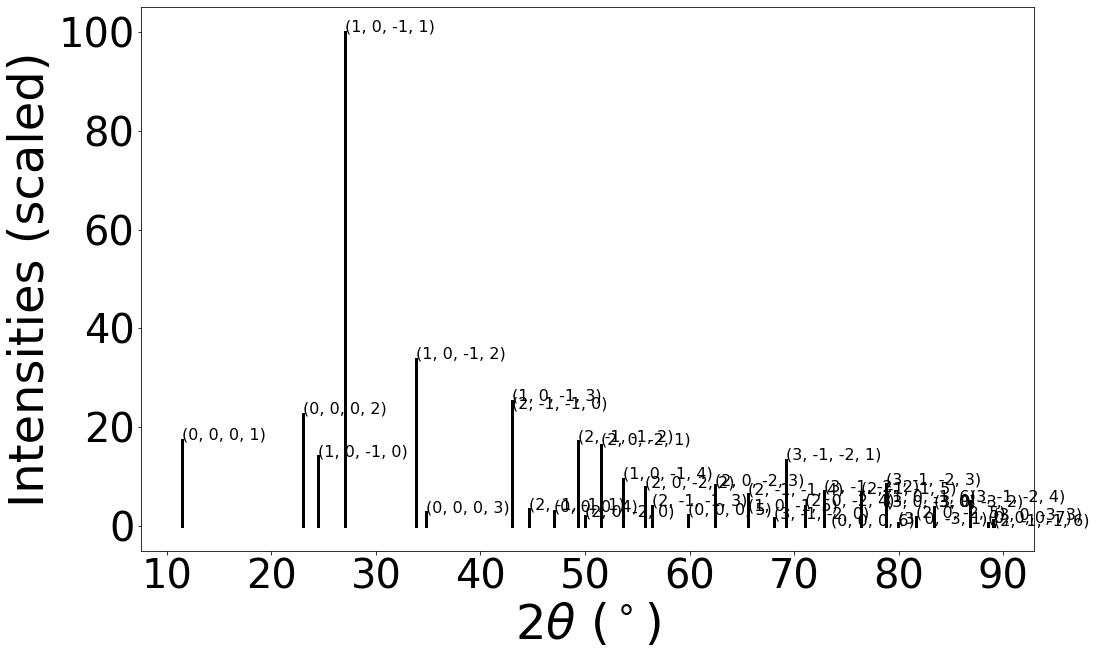

In [4]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
with MPRester("ktopgq8J6C3OwUSa") as m:
    structure = m.get_structure_by_material_id("mp-23205")
    sa = SpacegroupAnalyzer(structure)
    prim = sa.get_primitive_standard_structure()
    
    xrdcalcu = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)
    xrdcalc = xrdcalcu.get_pattern(structure = structure, scaled=True, two_theta_range=(0, 90))
    xrdcalcu.get_plot(structure)

La position des pics de diffraction s'obtient avec la loi de Bragg :
$$2d_{hkl} \sin(\theta) = n \lambda$$
* d : distance interplannaire
    * $d_{hkl}=\frac{2 \pi}{|{\bf K}|}$
    * ${\bf K} = h {\bf a^*} + k {\bf b^*} + l {\bf c^*}$, vecteur du réseau réciproque
* $2 \theta$ : angle caractéristique de la diffraction
* n : ordre de la réaction
* $\lambda$ : longueur d'onde des rayons X utilisés 
    * ici : rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å
    
    
L'intensité des pics de diffraction s'obtient comme :
$$I \propto |S_{\bf K}|^2$$
* $S_{\bf K}$ : facteur de maille défini par $S_{\bf K} = \sum f_j({\bf K}) e^{i{\bf K}{\bf r}_j}$



# Premier pic

In [8]:
    print('Angle associé au pic 1 : ' + str((xrdcalc.x)[0]))
    print('Intensité associé au pic 1 : ' + str((xrdcalc.y)[0]))
    print('Distance associé au pic 1 : ' + str((xrdcalc.d_hkls)[0]))
    print('Indices associé au hkl pic 1 : ' + str((xrdcalc.hkls)[0]))

Angle associé au pic 1 : 11.445455246158557
Intensité associé au pic 1 : 17.50852372867325
Distance associé au pic 1 : 7.73127647
Indices associé au hkl pic 1 : [{'hkl': (0, 0, 0, 1), 'multiplicity': 2}]


# Deuxième pic

In [9]:
    print('Angle associé au pic 2 : ' + str((xrdcalc.x)[1]))
    print('Intensité associé au pic 2 : ' + str((xrdcalc.y)[1]))
    print('Distance associé au pic 2 : ' + str((xrdcalc.d_hkls)[1]))
    print('Indices associé au hkl pic 2 : ' + str((xrdcalc.hkls)[1]))

Angle associé au pic 2 : 23.007129883025176
Intensité associé au pic 2 : 22.770969152355462
Distance associé au pic 2 : 3.865638235
Indices associé au hkl pic 2 : [{'hkl': (0, 0, 0, 2), 'multiplicity': 2}]


# Troisième pic

In [10]:
    print('Angle associé au pic 3 : ' + str((xrdcalc.x)[2]))
    print('Intensité associé au pic 3 : ' + str((xrdcalc.y)[2]))
    print('Distance associé au pic 3 : ' + str((xrdcalc.d_hkls)[2]))
    print('Indices associé au hkl pic 3 : ' + str((xrdcalc.hkls)[2]))

Angle associé au pic 3 : 24.417000184350666
Intensité associé au pic 3 : 14.131369141104441
Distance associé au pic 3 : 3.645532394279032
Indices associé au hkl pic 3 : [{'hkl': (1, 0, -1, 0), 'multiplicity': 6}]


Les valeurs obtenues sont bien vérifiées par celles de Materials Project, comme on peut le voir sur l'image ci-dessous du diffractogramme du MgI2 pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å :


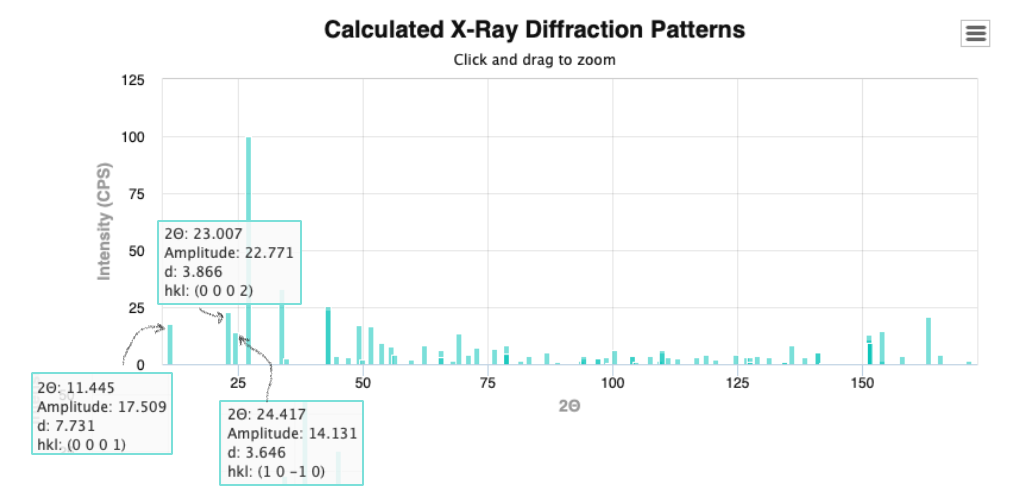

In [12]:
from IPython.display import Image
Image(filename='3pics.png')

# Bibliographie
[1] *Materials project mp-23205*, URL: https://materialsproject.org/materials/mp-23205/

[2] *MgI2_mp-23205_symmetrized.cif*, URL: https://github.com/laralej/lmapr1492/blob/master/MgI2_mp-23205_symmetrized.cif

[3] *Chapitre 3 : Introduction à la radiocristallographie*, URL: https://moodleucl.uclouvain.be/pluginfile.php/1274328/mod_resource/content/1/Chap-3.pdf